# Linear Regression with Python Scikit learm

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. 

## Simple Linear Regression 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('student_score.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to know the shift of our dataset and see if we can manually find any relationship between the data. 

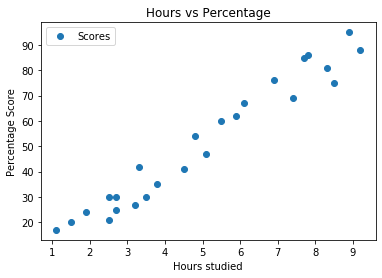

In [8]:
df.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

It can be easily observed from the graph, that there is a positive relation between the number of hours studied and percentage of score.

## Prepare the data 

Now,the next step is to divide the data into "attributes"(inputs) and "labels"(outputs)

In [19]:
#input is number of hours devoted
X = df.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [24]:
#output is percentage scored
y = df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now, the next step will be split the data into training and testing data. This can be done using scikit-learn's built-in train_test_split() function

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

## Display the Training Set

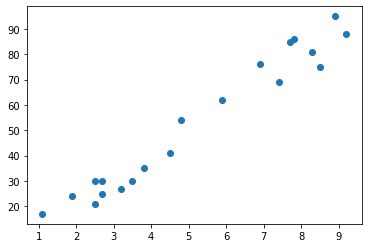

In [26]:
plt.scatter(X_train, y_train)
plt.show()

## Display the Testing Set

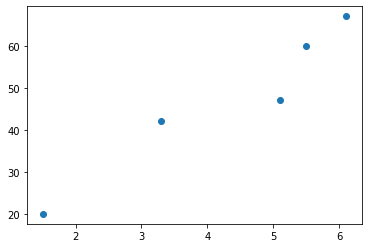

In [28]:
plt.scatter(X_test, y_test)
plt.show()

## Training the Algorithm

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(model.intercept_)
print(model.coef_)

1.1192869460124797
[9.90957862]


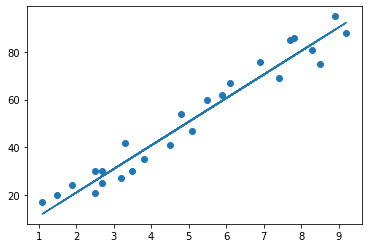

In [33]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Make Predictions 

Now as training is done, it's time to make some predictions

In [34]:
y_pred = model.predict(X_test)

In [37]:
#let's compare actual and predicted data
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,47,51.658138
1,67,61.567717
2,42,33.820896
3,20,15.983655
4,60,55.621969


In [43]:
hr = [[9.25]]
score_pred = model.predict(hr)
print("Predicted score is {} for {} hours".format(score_pred[0],hr[0][0]))

Predicted score is 92.78288920986309 for 9.25 hours


## Evaluating the algorithm

The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE

In [45]:
from sklearn import metrics
print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error is: 5.332780144143608
Mean Squared Error is: 30.680773676057676
Root Mean Squared Error is: 5.539022808768499
